<a href="https://colab.research.google.com/github/PyBlin/Study/blob/main/pd_Visualize/pd_plot03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/iris.csv')
data.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


# 5.Plot formatting

## 5.1 General plot style arguments

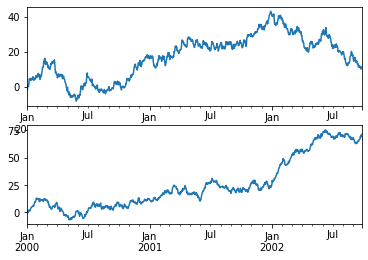

In [3]:
ts1 = pd.Series(np.random.randn(1000), 
               index=pd.date_range("1/1/2000", periods=1000))
ts1 = ts1.cumsum()

ts2 = pd.Series(np.random.randn(1000), 
               index=pd.date_range("1/1/2000", periods=1000))
ts2 = ts2.cumsum()

plt.subplot(211)
ts1.plot();

plt.subplot(212)
ts2.plot();

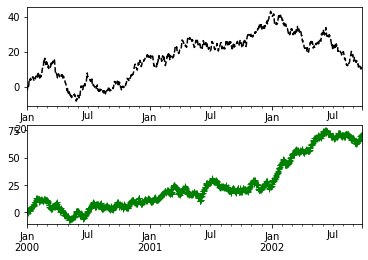

In [4]:
plt.subplot(211)
ts1.plot(style='k--');

plt.subplot(212)
ts2.plot(style='g+');

* `style='color and style'` : 색상과 스타일을 동시에 지정할 수 있습니다.

## 5.2 Controlling the legend

In [5]:
ts = pd.Series(np.random.randn(1000), 
               index=pd.date_range("1/1/2000", periods=1000))

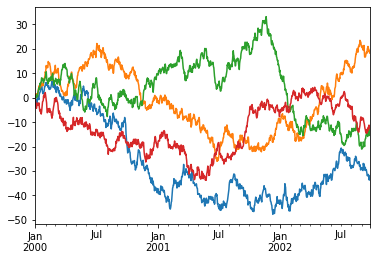

In [6]:
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df.plot(legend=False);

## 5.3 Controlling the labels

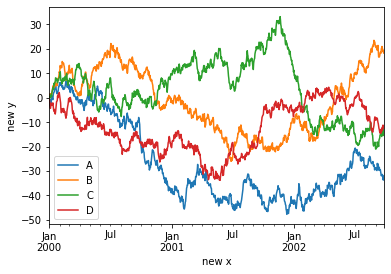

In [7]:
df.plot(xlabel='new x', ylabel='new y');

## 5.4 Scales

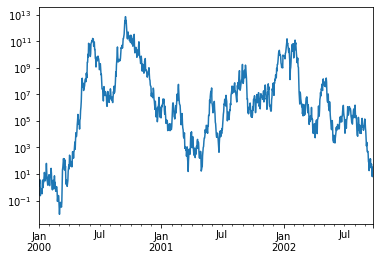

In [8]:
ts = pd.Series(np.random.randn(1000), 
               index=pd.date_range("1/1/2000", periods=1000))
ts = np.exp(ts.cumsum())
ts.plot(logy=True);

* `logx=True` : x축의 범위를 log 로 바꿔줍니다.
* `logy=True` : y축의 범위를 log 로 바꿔줍니다.
* `loglog=True` : x축, y축의 범위를 log 로 바꿔줍니다.

## 5.5 Plotting on a secondary y-axis

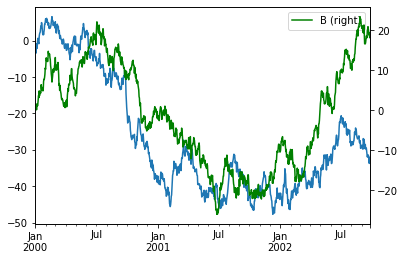

In [9]:
df['A'].plot();
df['B'].plot(secondary_y=True, style='g', legend=True);

* `secondary_y=True` : 두 번째 y축을 설정해줍니다.

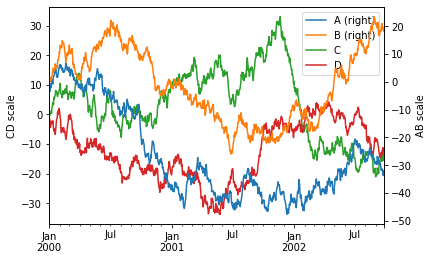

In [10]:
ax = df.plot(secondary_y=['A','B'])
ax.set_ylabel('CD scale');
ax.right_ax.set_ylabel('AB scale');

* A, B 그래프는 두 번째 (오른쪽) y축에 해당합니다.
* C, D 그래프는 첫 번째 (왼쪽) y축에 해당합니다.
* `.set_ylabel('text')` : y축 라벨을 설정합니다.
* `.right_ax.ylabel('text')` : 오른쪽 y축 라벨을 설정합니다.

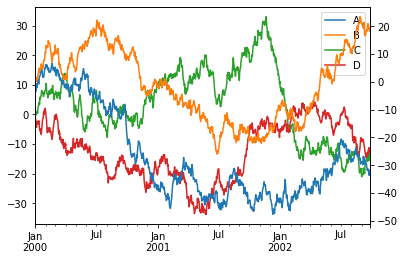

In [11]:
df.plot(secondary_y=['A','B'], mark_right=False);

* `mark_right` : legend 에 표시된 (right) 텍스트 표시 여부를 결정할 수 있습니다.

## 5.6 Suppressing tick resolution adjustment

* 눈금 해상도 조정 억제

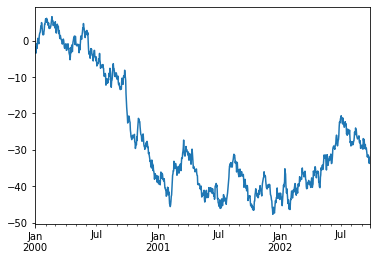

In [12]:
df['A'].plot();

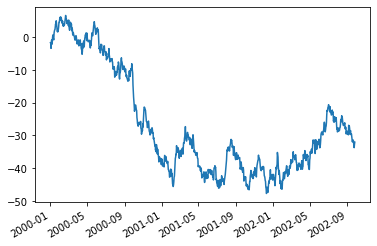

In [13]:
df['A'].plot(x_compat=True);

* `x_compat=True` : x축의 눈금을 보다 알기 쉽게 보여줍니다.

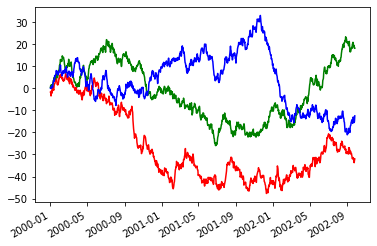

In [14]:
with pd.plotting.plot_params.use('x_compat', True):
    df['A'].plot(c='r')
    df['B'].plot(c='g')
    df['C'].plot(c='b')

* `with pd.plotting.plot_params.use('x_compat', True):` : with 문으로 여러 개의 x축 눈금을 사용할 수 있습니다.

## 5.7 Subplots

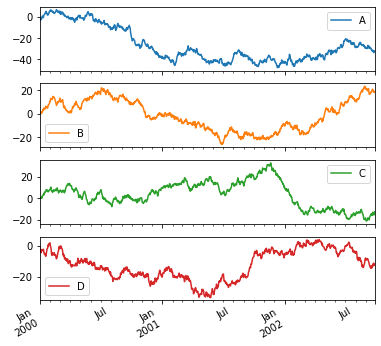

In [15]:
df.plot(subplots=True, figsize=(6,6));

* `subplots=True` : 그래프를 여러 개 그릴 수 있습니다.

## 5.8 Using layout and targeting multiple axes

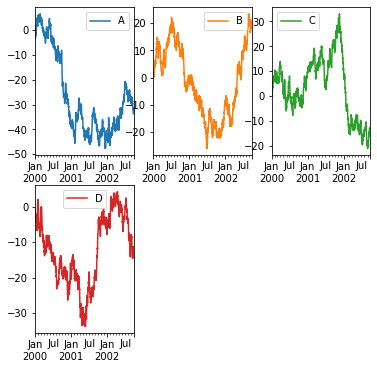

In [16]:
df.plot(subplots=True, layout=(2,3), figsize=(6,6), sharex=False);

* `layout=(w,h)` : subplot을 표현할 행렬 크기를 결정합니다.
* `sharex` : x축을 공유할지 안할지 결정합니다.

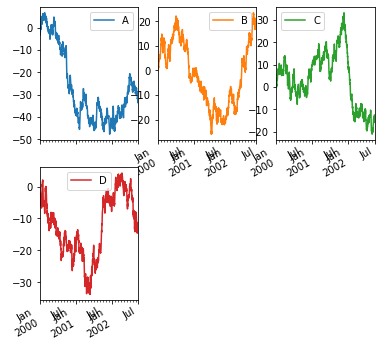

In [17]:
df.plot(subplots=True, layout=(2,3), figsize=(6,6), sharex=True);

* layout 크기와 x축이 잘 맞지 않아 그래프가 이상하게 출력됩니다.

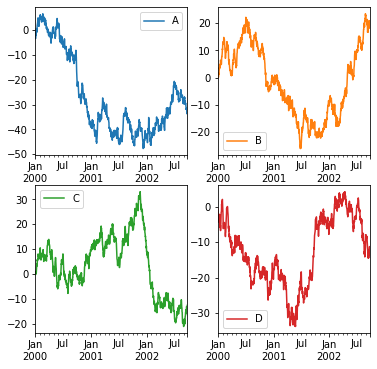

In [18]:
df.plot(subplots=True, layout=(2,-1), figsize=(6,6), sharex=False);

* `layout=(w,-1)` : height 에 -1 을 사용하면 알맞은 subplot 행렬로 출력됩니다.

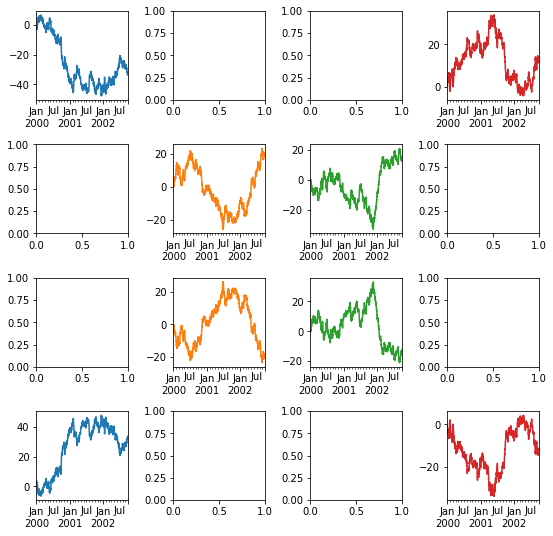

In [19]:
fig, axes = plt.subplots(4, 4, figsize=(9,9))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

target1 = [axes[0][0], axes[1][1], axes[2][2], axes[3][3]]
target2 = [axes[3][0], axes[2][1], axes[1][2], axes[0][3]]

df.plot(subplots=True, ax=target1, legend=False, sharex=False, sharey=False);
(-df).plot(subplots=True, ax=target2, legend=False, sharex=False, sharey=False);

* `fig, axes = plt.subplots(w, h, figsize=(x,y))` : 자주 쓰이는 표현이니 숙지합시다.
* `plt.subplots_adjust(wspace=0.5, hspace=0.5)` : 각 그래프 사이의 간격을 설정합니다.
* `sharex=False, sharey=False` : False 로 안하면 오류납니다.

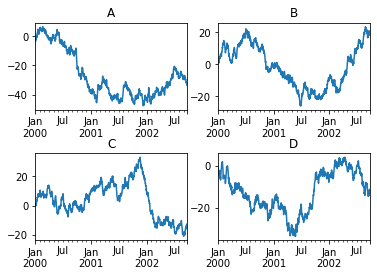

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

df['A'].plot(ax=axes[0,0]);
axes[0,0].set_title('A');
df['B'].plot(ax=axes[0,1]);
axes[0,1].set_title('B');
df['C'].plot(ax=axes[1,0]);
axes[1,0].set_title('C');
df['D'].plot(ax=axes[1,1]);
axes[1,1].set_title('D');

* `nrows=2, ncols=2` : subplot 이 그려질 행렬 바탕을 설정합니다.
* `ax[w,h].set_title('text')` : ax[w,h]에 해당하는 그래프의 제목을 설정합니다.
* 제목이 바로 위의 그래프와 겹칠 경우에는 hspace 를 높여줍니다.

## 5.9 Plotting with errors bars

In [21]:
# Generate the data
ix3 = pd.MultiIndex.from_arrays([
      ['a','a','a','a','a','b','b','b','b','b'], 
      ['foo','foo','foo','bar','bar','foo','foo','bar','bar','bar']], 
      names=['letter', 'word'])

df3 = pd.DataFrame({'data1':[9,3,2,4,3,2,4,6,3,2], 
                    'data2':[9,6,5,7,5,4,5,6,5,1]}, index=ix3)

df3

data1  data2
letter word              
a      foo       9      9
       foo       3      6
       foo       2      5
       bar       4      7
       bar       3      5
b      foo       2      4
       foo       4      5
       bar       6      6
       bar       3      5
       bar       2      1

In [22]:
# Group by index labels and take the means and standard deviations
gp3 = df3.groupby(level=('letter', 'word'))
means = gp3.mean()
errors = gp3.std()

print(means, '\n')
print(errors)

                data1     data2
letter word                    
a      bar   3.500000  6.000000
       foo   4.666667  6.666667
b      bar   3.666667  4.000000
       foo   3.000000  4.500000 

                data1     data2
letter word                    
a      bar   0.707107  1.414214
       foo   3.785939  2.081666
b      bar   2.081666  2.645751
       foo   1.414214  0.707107


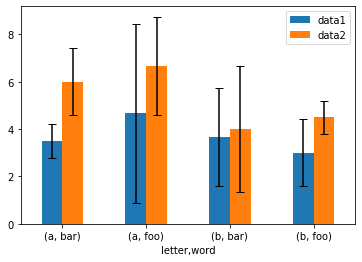

In [23]:
# plot
fig, ax = plt.subplots()
means.plot.bar(yerr=errors, ax=ax, capsize=4, rot=0);

* `xerr` : x축에 오차를 표시합니다???
* `yerr` : y축에 오차를 표시합니다???
* `capsize` : 오차의 cap 크기를 설정합니다.
* `rot` : x축 텍스트의 회전을 설정합니다. (값이 높을 수록 시계방향으로 회전)

In [24]:
mins = gp3.min()
maxs = gp3.max()

# errors should be positive, and defined in the order of lower, upper
errors = [[means[c]-mins[c], maxs[c]-means[c]] for c in df3.columns]
errors

[[letter  word
  a       bar     0.500000
          foo     2.666667
  b       bar     1.666667
          foo     1.000000
  Name: data1, dtype: float64, letter  word
  a       bar     0.500000
          foo     4.333333
  b       bar     2.333333
          foo     1.000000
  Name: data1, dtype: float64], [letter  word
  a       bar     1.000000
          foo     1.666667
  b       bar     3.000000
          foo     0.500000
  Name: data2, dtype: float64, letter  word
  a       bar     1.000000
          foo     2.333333
  b       bar     2.000000
          foo     0.500000
  Name: data2, dtype: float64]]

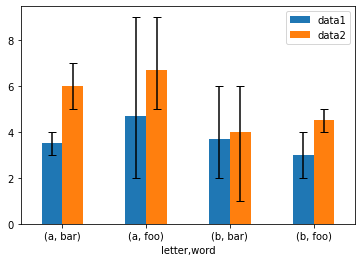

In [25]:
# plot
fig, ax = plt.subplots()
means.plot.bar(yerr=errors, ax=ax, capsize=4, rot=0);

* 비대칭 오차 막대 그래프로 가능합니다.
* 하지만, 무슨 말인지 모르겠습니다... ㅠㅠ

## 5.10 Plotting tables

In [26]:
df = pd.DataFrame(np.random.rand(5,3), columns=['a','b','c'])
df

,a,b,c
0,0.387405,0.259035,0.706186
1,0.523515,0.838506,0.641813
2,0.583557,0.768141,0.864269
3,0.107793,0.239369,0.133494
4,0.290385,0.454499,0.210018


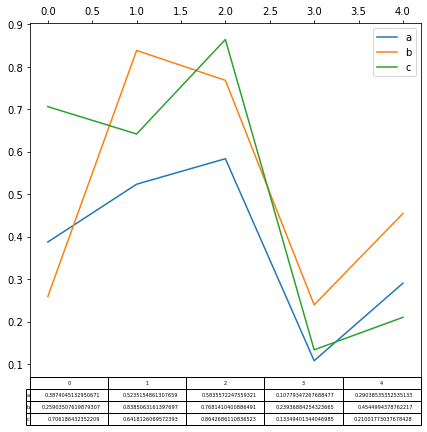

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(7, 6.5))
ax.xaxis.tick_top()
df.plot(table=True, ax=ax);

* `ax.xaxis.tick_top()` : x축 텍스트를 그래프 위에 표시합니다.
* `table=True` : 그래프 밑에 해당 값을 표시하는 테이블을 표시합니다.

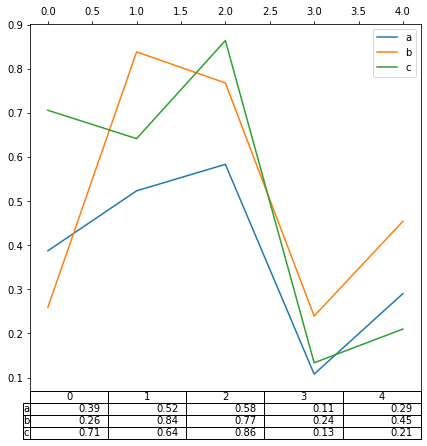

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(7, 6.75))
ax.xaxis.tick_top()
df.plot(table=np.round(df.T,2), ax=ax);

* `table=np.round(df.T, 2)` : 테이블에 표시될 값을 전치행렬을 통해 바꿔줍니다.
* Tanspose : 전치

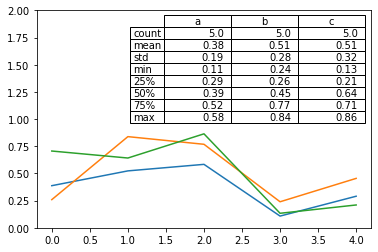

In [29]:
from pandas.plotting import table

fig, ax = plt.subplots(1,1)
table(ax, np.round(df.describe(),2), loc='upper right', 
      colWidths=[0.2, 0.2, 0.2]);
df.plot(ax=ax, ylim=(0,2), legend=None);

* `loc='position'` : 테이블이 표시될 위치를 지정합니다.
* `colWidths=[0.1, 0.1, 0.1]` : 각 컬럼에 해당하는 너비를 지정합니다. (컬럼의 수와 일치해야 합니다.)
* `ylim=(from, to)` : y축의 범위를 지정합니다.
* `legend=None` : legend 가 있으면 테이블과 겹칠 수 있습니다.

## 5.11 Colormaps

* 많은 컬럼을 표현할 때 잠재적으로 같은 색상을 반복할 수 있습니다.
* 이 문제를 해결하기 위해 컬러맵을 사용할 수 있습니다.
* https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html

In [30]:
df = pd.DataFrame(np.random.randn(1000,10), index=ts.index)
df = df.cumsum()
df

,0,1,2,3,4,5,6,7,8,9
2000-01-01,-0.366416,0.122613,0.869586,-1.060852,0.859187,0.318992,0.702154,-0.735570,-0.058891,-1.380280
2000-01-02,-1.311184,-0.112083,2.697694,1.332383,0.216276,0.482672,1.944141,-1.944968,-1.051475,-0.017459
2000-01-03,-0.966029,1.269063,2.678229,1.496261,-0.334645,0.344880,2.542223,-1.648646,-0.172278,0.142476
2000-01-04,-0.377751,1.991163,2.180379,1.107202,-0.922663,1.584563,4.136555,-0.732942,-1.257254,-0.839188
2000-01-05,-0.127710,1.781688,0.928332,1.408252,-0.284874,2.144212,4.683423,-2.592897,-0.788753,-0.098054
...,...,...,...,...,...,...,...,...,...,...
2002-09-22,9.092232,-21.831724,53.359744,-40.405874,25.608938,13.718091,-5.195591,10.617693,-5.803187,-2.166068
2002-09-23,9.628413,-20.741957,55.747458,-41.594917,25.535455,14.282533,-6.916042,12.196548,-5.879466,-2.320379
2002-09-24,11.404464,-19.647312,56.076318,-40.823243,25.010592,14.485790,-6.653822,10.782558,-6.997795,-3.567731
2002-09-25,11.810802,-20.952867,54.887165,-41.068063,25.476443,14.544395,-7.506220,11.125445,-6.994110,-1.436564


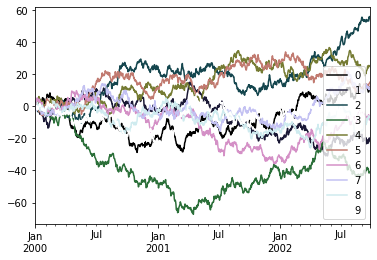

In [31]:
df.plot(colormap='cubehelix');

* `colormap='cubehelix'` : cubehelix 컬러맵으로 표현합니다.

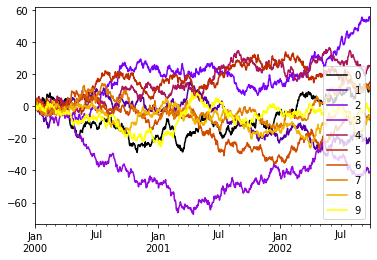

In [32]:
from matplotlib import cm

df.plot(colormap=cm.gnuplot);

* `from matplotlib import cm` 으로 직접 컬러맵을 불러올 수 있습니다.

In [33]:
dd = pd.DataFrame(np.random.randn(10,10)).applymap(abs)
dd = dd.cumsum()
dd

,0,1,2,3,4,5,6,7,8,9
0,0.035055,0.748261,0.556401,0.010719,0.140323,0.684500,0.079754,0.532799,1.919880,0.479380
1,0.504182,1.400694,1.277704,1.164430,0.256545,1.086207,0.782417,1.818441,2.420997,1.371822
2,0.948178,1.659357,2.061632,1.962812,0.937090,1.388096,2.041271,2.192933,3.055890,1.984488
3,1.859702,2.927560,2.717434,2.180821,1.183001,1.465529,2.156770,2.417138,4.781175,3.560219
4,2.319494,2.954348,2.844991,2.784874,1.622460,3.260572,3.377423,3.451151,6.732232,4.261990
5,2.754307,3.710856,2.857749,3.190952,2.443191,3.917407,4.375513,4.522148,8.628160,5.260341
6,3.186472,4.281784,2.975902,4.047116,2.713817,4.092326,5.346380,5.152713,9.248473,5.637114
7,3.422135,4.902470,3.374671,5.591742,3.249567,4.909917,6.613737,5.788316,10.271064,7.619756
8,4.048441,6.155103,3.465909,5.799218,3.251551,5.429055,9.014672,7.484810,10.282076,7.883775
9,5.748532,6.607661,4.116925,6.472219,3.486173,5.915761,10.145276,7.630472,11.623746,10.166722


* `.applymap()` : 데이터프레임에 적용할 요소별 함수를 지정합니다. 여기서는 절댓값 함수를 사용했습니다.

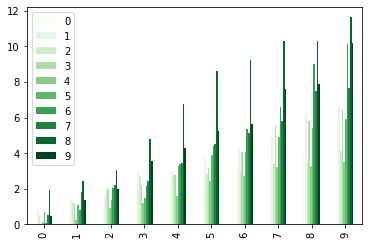

In [34]:
dd.plot.bar(colormap='Greens');

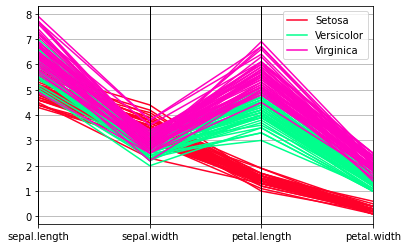

In [35]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(data, 'variety', colormap='gist_rainbow');

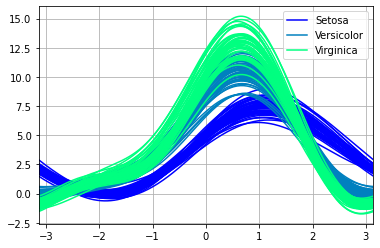

In [36]:
from pandas.plotting import andrews_curves

andrews_curves(data, 'variety', colormap='winter');

# 6.Plotting directly with matplotlib

In [37]:
price = pd.Series(np.random.randn(150).cumsum(), 
                  index=pd.date_range('2000-1-1', periods=150, freq='B'))
ma = price.rolling(20).mean()
mstd = price.rolling(20).std()
print(ma, '\n')
print(mstd)

2000-01-03          NaN
2000-01-04          NaN
2000-01-05          NaN
2000-01-06          NaN
2000-01-07          NaN
                ...    
2000-07-24    12.930100
2000-07-25    12.977148
2000-07-26    13.052728
2000-07-27    13.077998
2000-07-28    13.185143
Freq: B, Length: 150, dtype: float64 

2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
                ...   
2000-07-24    1.082918
2000-07-25    1.091094
2000-07-26    1.129339
2000-07-27    1.156013
2000-07-28    1.233844
Freq: B, Length: 150, dtype: float64


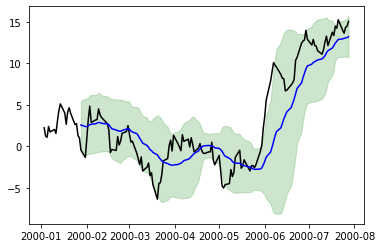

In [38]:
plt.plot(price.index, price, 'k');
plt.plot(ma.index, ma, 'b');
plt.fill_between(mstd.index, ma-2*mstd, ma+2*mstd, color='g', alpha=0.2);

* `plt.fill_between(x, y1, y2)` : 설정한 y1과 y2 사이를 지정된 색상으로 채워줍니다.